In [1]:
install.packages('nortest')
install.packages('carData')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


#### 4.3
A chemist wishes to test the effect of four chemical agents on the strength of a particular type of cloth. Because there might be variability from one bolt to another, the chemist decides to use a randomized block design, with the bolts of cloth considered as blocks. She selects five bolts and applies all four chemicals in random order to each bolt. The resulting tensile strengths follow. Analyze the data from this experiment (use a=0.05) and draw appropriate conclusions. 

In [2]:
bolt = c(1,2,3,4,5)
chem1 = c(73,68,74,71,67)
chem2 = c(73,67,75,72,70)
chem3 = c(75,68,78,73,68)
chem4 = c(73,71,75,75,69)

chem = data.frame(bolt,chem1,chem2, chem3, chem4)
chemLong = reshape(chem,
                  varying = c("chem1", "chem2", "chem3", "chem4"),
                  v.names="Strength", timevar="Chem", direction='long')

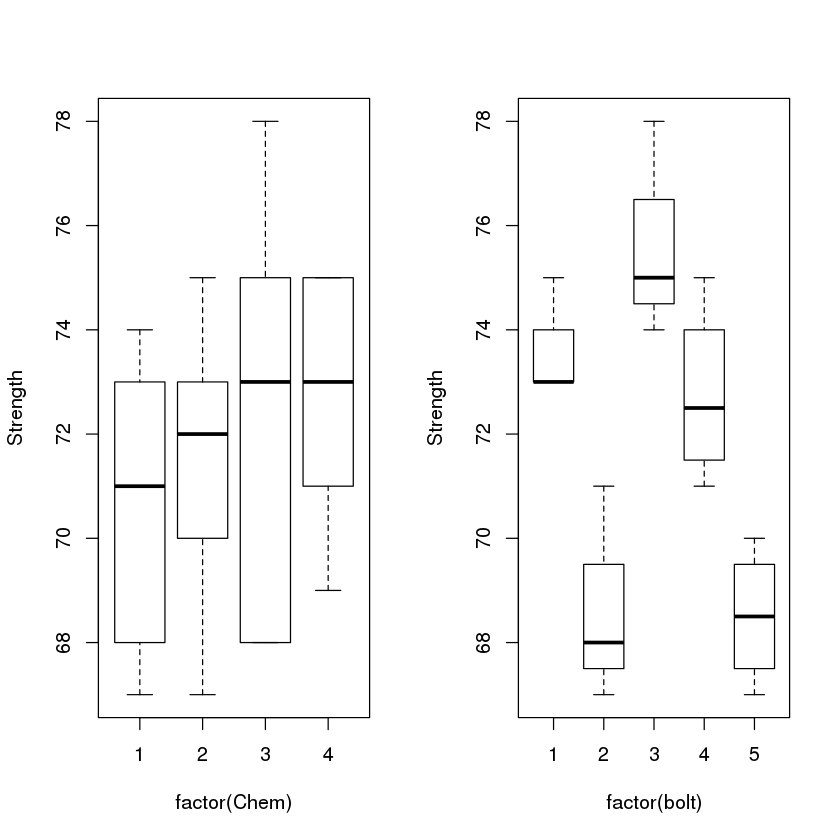

In [3]:
par(mfcol = c(1, 2))
plot(Strength ~ factor(Chem) + factor(bolt), data = chemLong)
par(mfrow=c(1,1))

             Df Sum Sq Mean Sq F value   Pr(>F)    
factor(Chem)  3  12.95    4.32   2.376    0.121    
factor(bolt)  4 157.00   39.25  21.606 2.06e-05 ***
Residuals    12  21.80    1.82                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] 71.75

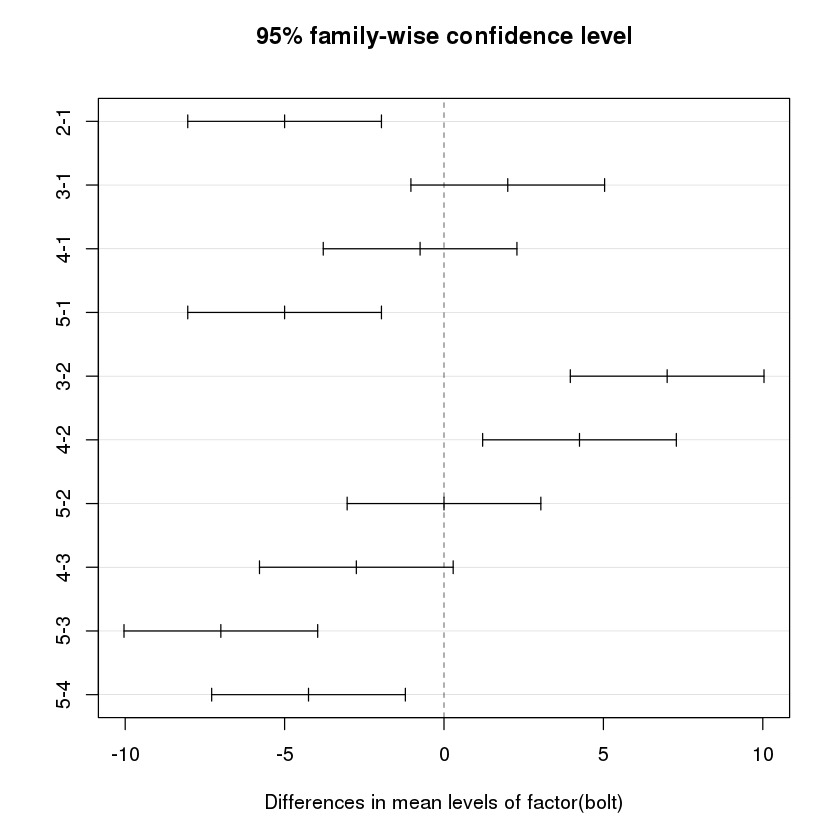

In [5]:
#################################
#  ANOVA test and estimation    #
#################################
#ANOVA analysis
chem.aov = aov(Strength ~ factor(Chem) + factor(bolt), data = chemLong)
summary(chem.aov)
MSe=summary(chem.aov)[[1]][3,3]

#Esimation of the model parameters
#estimate of overall mean mu
overall.mean=mean(chemLong$Strength)
overall.mean

ybar.trt=as.vector(with(chemLong, tapply(Strength,bolt,function(x) mean(x)))) #bar(Y_i.) vector
#Tukey's method (for comparing all possible pairwise means)
chem.TK=TukeyHSD(chem.aov, "factor(bolt)")
plot(chem.TK)

In [6]:

#estimate of treatment effect tau_i
with(chemLong,  tapply(Strength, bolt, function(x) mean(x) - overall.mean))
# with(graftLong, tapply(Yield,Pressure,function(x) mean(x) - overall.mean)) 

#estimate of block effect beta_j
with(chemLong, tapply(Strength, Chem, function(x) mean(x) - overall.mean))


ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

1     2     3     4     5 
 1.75 -3.25  3.75  1.00 -3.25

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

1     2     3     4 
-1.15 -0.35  0.65  0.85

             Df Sum Sq Mean Sq F value   Pr(>F)    
factor(Chem)  3  12.95    4.32   2.376    0.121    
factor(bolt)  4 157.00   39.25  21.606 2.06e-05 ***
Residuals    12  21.80    1.82                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] 71.75

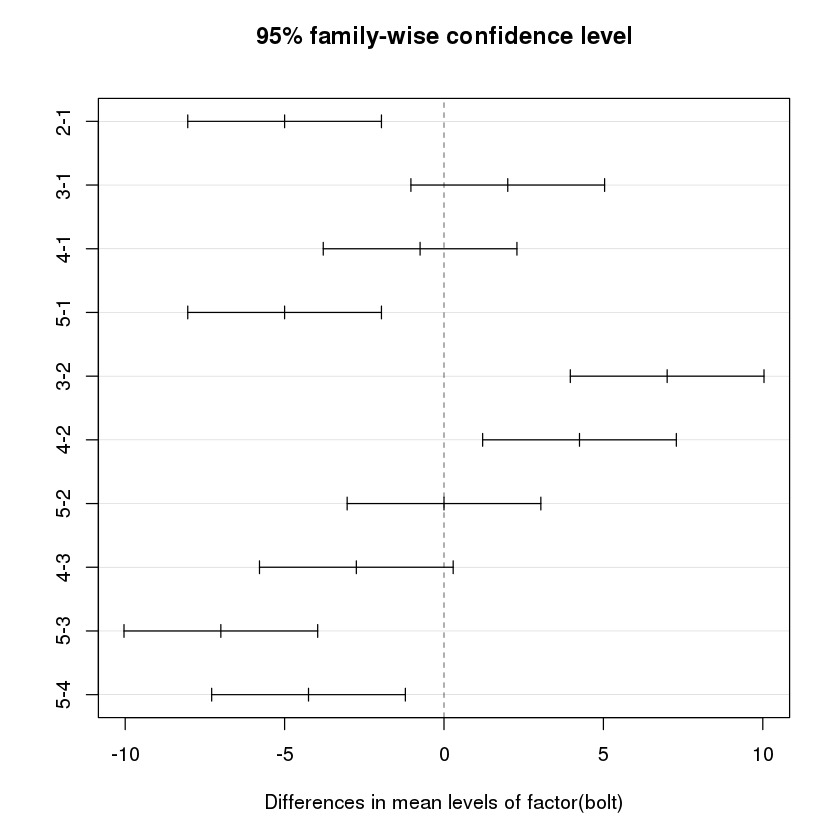

3.3 5.2 
 13  10


	Anderson-Darling normality test

data:  res
A = 0.72637, p-value = 0.04874



	Cramer-von Mises normality test

data:  res
W = 0.12224, p-value = 0.05089



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  res
D = 0.20568, p-value = 0.02632



	Pearson chi-square normality test

data:  res
P = 11.5, p-value = 0.02148



	Shapiro-Francia normality test

data:  res
W = 0.91778, p-value = 0.08359


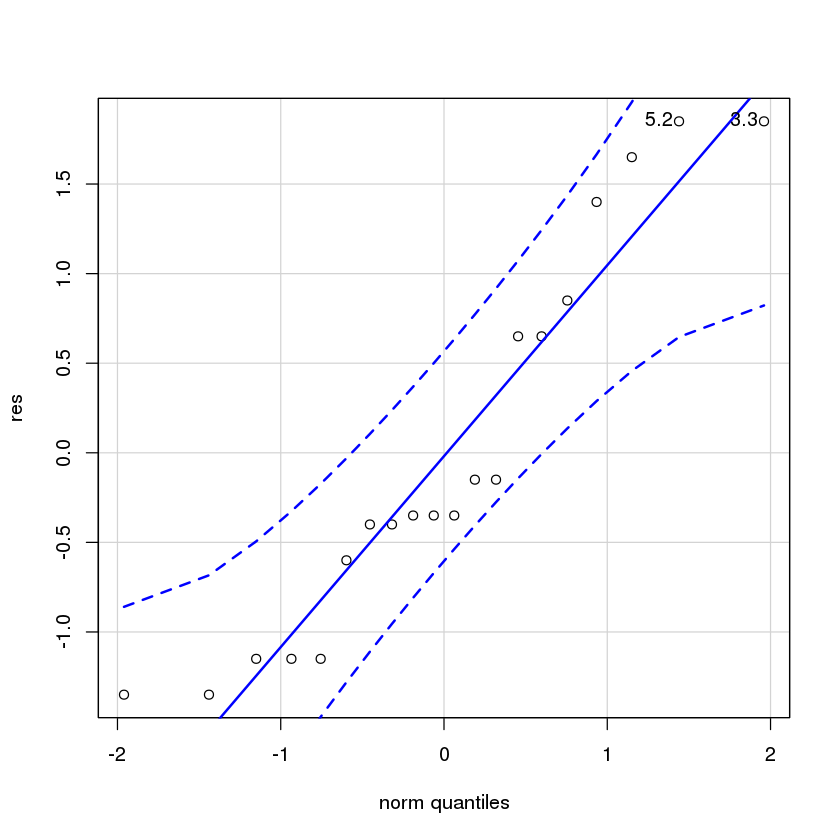

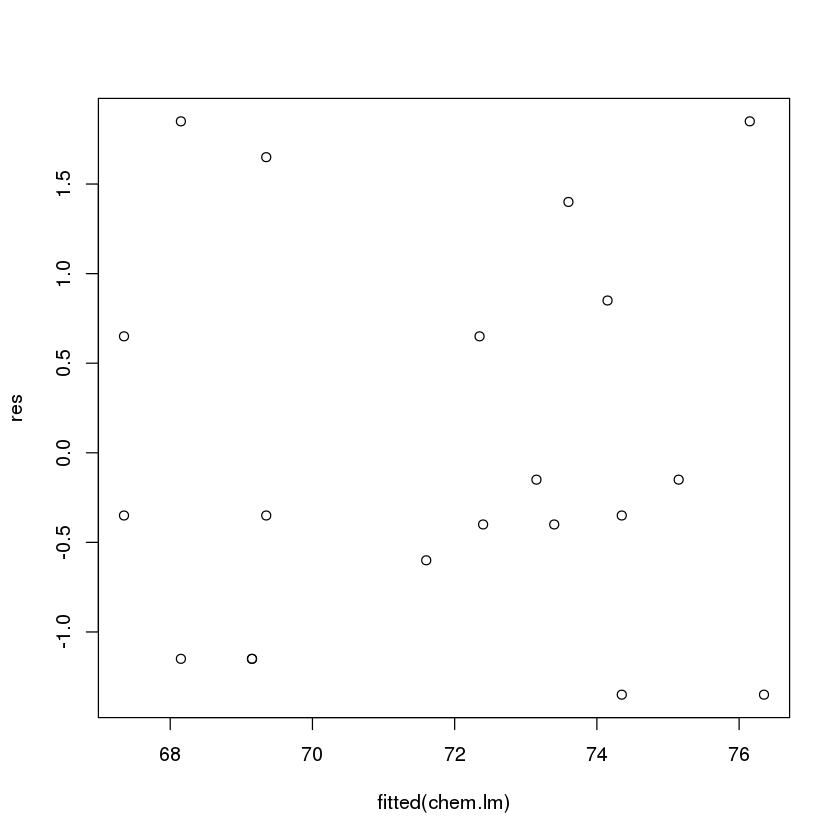

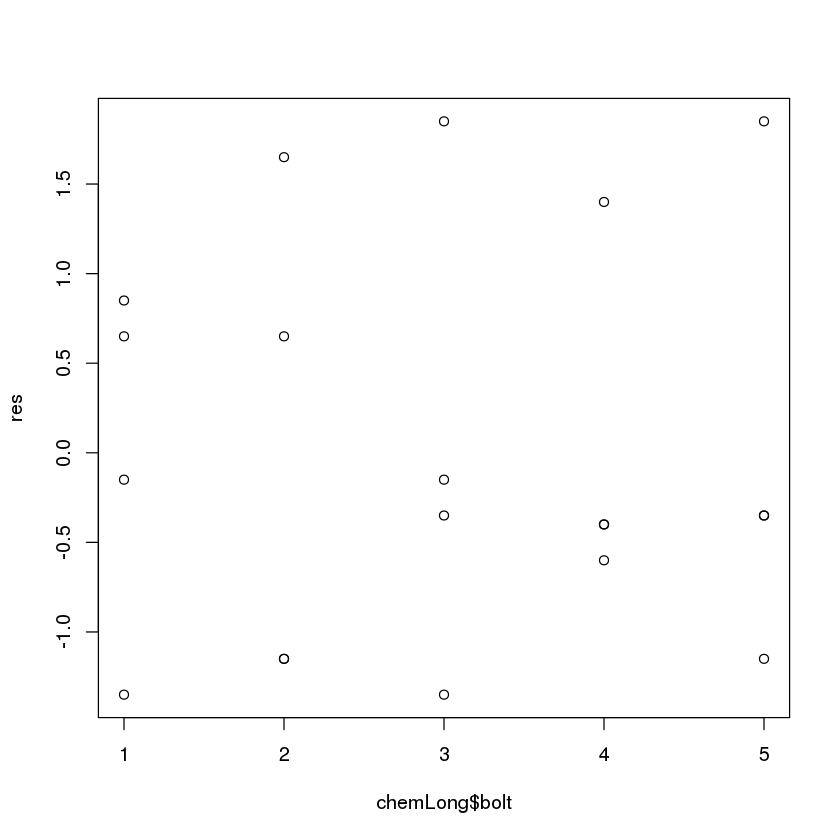


	Bartlett test of homogeneity of variances

data:  res by factor(Chem)
Bartlett's K-squared = 2.6757, df = 3, p-value = 0.4444



	Bartlett test of homogeneity of variances

data:  res by factor(bolt)
Bartlett's K-squared = 0.65699, df = 4, p-value = 0.9565


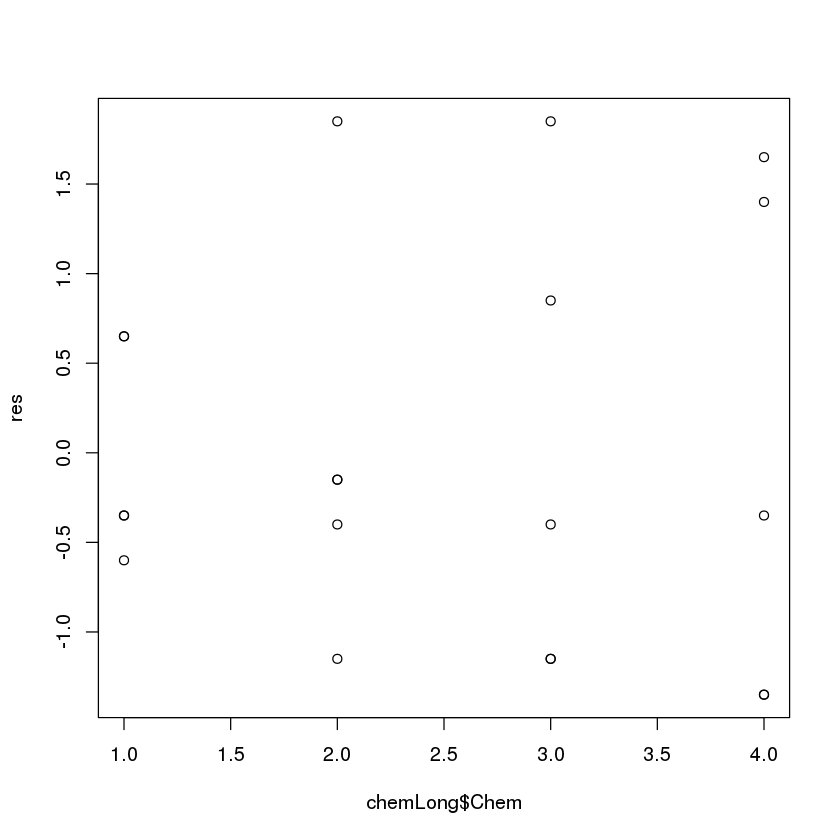

In [10]:

                                         

###########################
# Model Adequacy checking #
###########################
chem.lm=lm(Strength ~ factor(Chem) + factor(bolt), data = chemLong)
res=residuals(chem.lm)
#normal probability plot(qq plot)
library(car)
qqPlot(res)
#testing for normality of residual
library(nortest)
ad.test(res) #Anderson-Darling test for normality
cvm.test(res) #Cramer-von Mises test for normality
lillie.test(res) #Lilliefors (Kolmogorov-Smirnov) test for normality
pearson.test(res) #Pearson chi-square test for normality
sf.test(res)    #Shapiro-Francia test for normality

#residual plots
plot(fitted(chem.lm), res) 
plot(chemLong$bolt, res)
plot(chemLong$Chem, res)

#test homogeneity of variances 
with(chemLong, bartlett.test(res ~ factor(Chem)))
with(chemLong, bartlett.test(res ~ factor(bolt)))


#### 4.7
Consider the hardness testing experiment described in section 4.1. Suppose that the experiment was conducted as described and that the following Rockwell C-scale data:

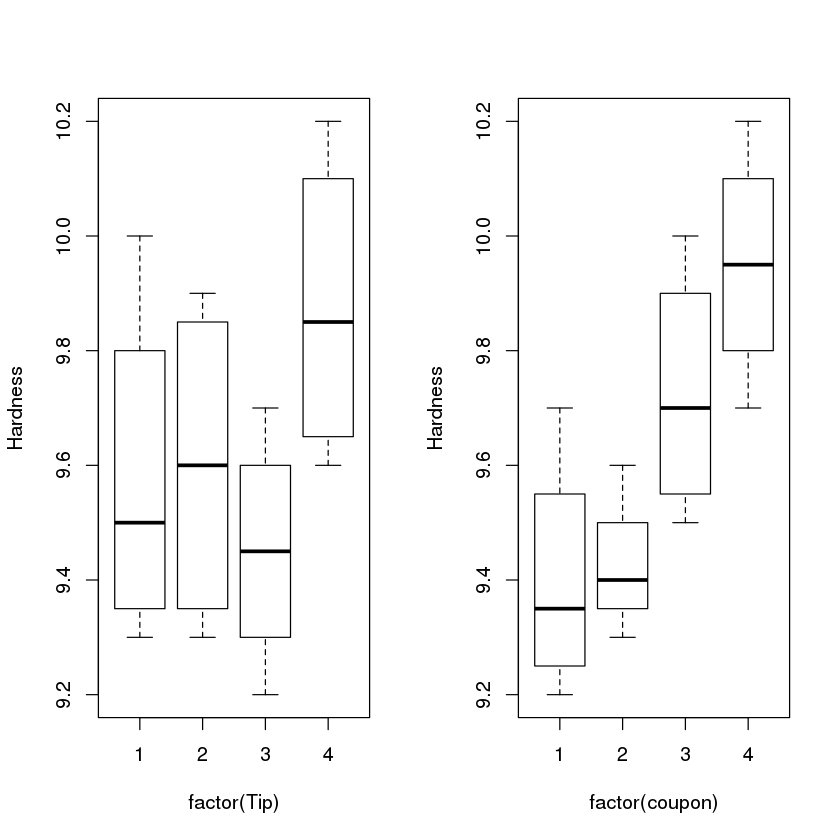

In [11]:
coupon = c(1,2,3,4)
tip1 = c(9.3,9.4,9.6, 10)
tip2 = c(9.4,9.3,9.8,9.9)
tip3 = c(9.2,9.4,9.5,9.7)
tip4 = c(9.7,9.6,10,10.2)

tip = data.frame(coupon,tip1,tip2,tip3,tip4)
tipLong = reshape(tip,
                  varying = c("tip1", "tip2", "tip3", "tip4"),
                  v.names="Hardness", timevar="Tip", direction='long')
par(mfcol = c(1, 2))
plot(Hardness ~ factor(Tip) + factor(coupon), data = tipLong)
par(mfrow=c(1,1))

               Df Sum Sq Mean Sq F value   Pr(>F)    
factor(Tip)     3  0.385 0.12833   14.44 0.000871 ***
factor(coupon)  3  0.825 0.27500   30.94 4.52e-05 ***
Residuals       9  0.080 0.00889                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] 9.625

[1] 2.262157

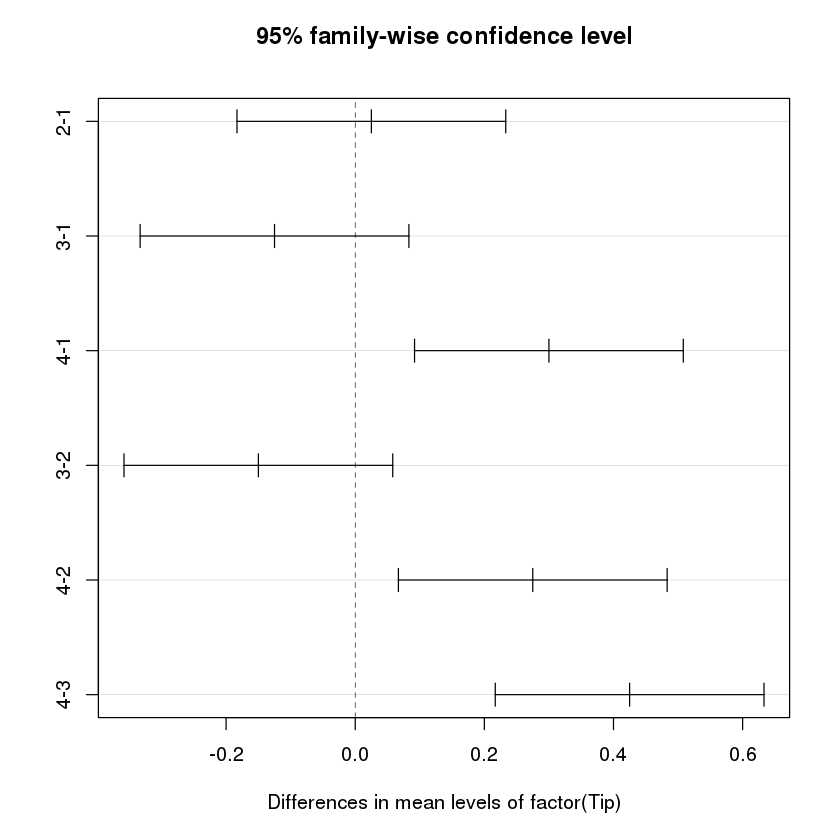

In [12]:
#################################
#  ANOVA test and estimation    #
#################################
#ANOVA analysis
tip.aov = aov(Hardness ~ factor(Tip) + factor(coupon), data = tipLong)
summary(tip.aov)
MSe=summary(tip.aov)[[1]][3,3]

#Esimation of the model parameters
#estimate of overall mean mu
overall.mean=mean(tipLong$Hardness)
overall.mean

ybar.trt=as.vector(with(tipLong, tapply(Hardness,Tip,function(x) mean(x)))) #bar(Y_i.) vector
#Tukey's method (for comparing all possible pairwise means)
tip.TK=TukeyHSD(tip.aov, "factor(Tip)")
plot(tip.TK)
   
#Fisher's LSD method 
#e H0: mu3=mu4 vs. Ha:mu3 is not equal to mu4
a=4;b=4;N=a*b;alpha=0.05
t0.a=(ybar.trt[1]-ybar.trt[2])/sqrt(2*MSe/b)
t0.b=(ybar.trt[1]-ybar.trt[3])/sqrt(2*MSe/b)
t0.c=(ybar.trt[1]-ybar.trt[4])/sqrt(2*MSe/b)
t0.d=(ybar.trt[2]-ybar.trt[3])/sqrt(2*MSe/b)
t0.e=(ybar.trt[2]-ybar.trt[4])/sqrt(2*MSe/b)
t0.f=(ybar.trt[3]-ybar.trt[4])/sqrt(2*MSe/b)

cri=qt(alpha/2,(a-1)*(b-1),lower.tail=F)
cri
pvalue0.a=2*pt(abs(t0.a),(a-1)*(b-1),lower.tail=F)
pvalue0.b=2*pt(abs(t0.b),(a-1)*(b-1),lower.tail=F)
pvalue0.c=2*pt(abs(t0.c),(a-1)*(b-1),lower.tail=F)
pvalue0.d=2*pt(abs(t0.d),(a-1)*(b-1),lower.tail=F)
pvalue0.e=2*pt(abs(t0.e),(a-1)*(b-1),lower.tail=F)
pvalue0.f=2*pt(abs(t0.f),(a-1)*(b-1),lower.tail=F)

[1] 0.7163449

[1] 0.09354966

[1] 0.001488949

[1] 0.05100326

[1] 0.002578639

[1] 0.0001290132

2.3 4.1 
 10   4


	Anderson-Darling normality test

data:  res
A = 0.37514, p-value = 0.3704



	Cramer-von Mises normality test

data:  res
W = 0.055036, p-value = 0.4175



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  res
D = 0.13395, p-value = 0.62



	Pearson chi-square normality test

data:  res
P = 5.875, p-value = 0.2087



	Shapiro-Francia normality test

data:  res
W = 0.94777, p-value = 0.3854


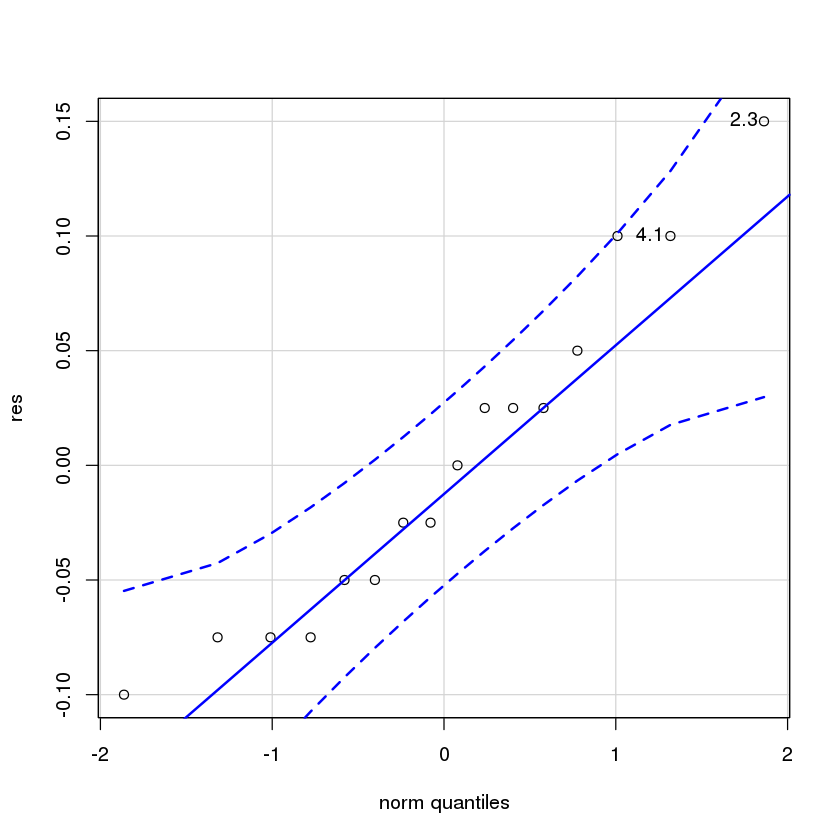

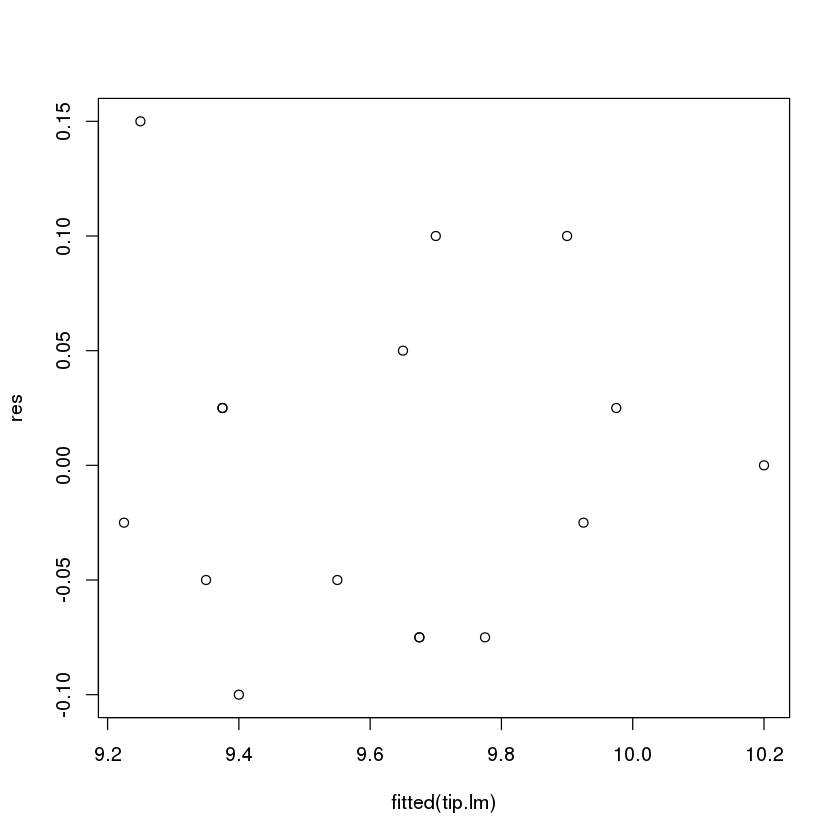

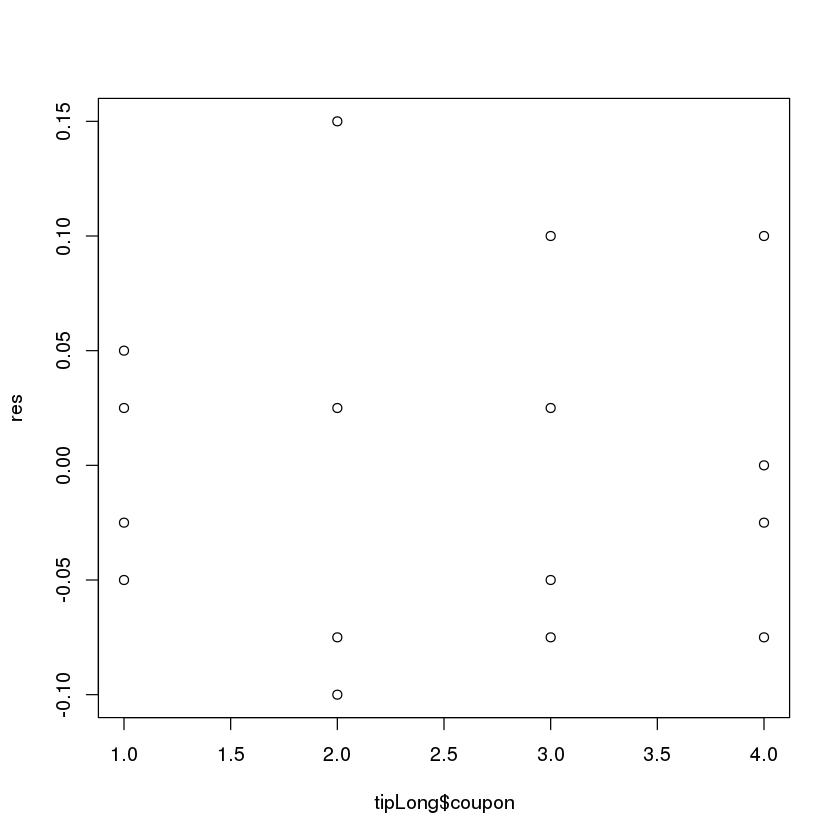


	Bartlett test of homogeneity of variances

data:  res by factor(coupon)
Bartlett's K-squared = 2.0386, df = 3, p-value = 0.5644



	Bartlett test of homogeneity of variances

data:  res by factor(Tip)
Bartlett's K-squared = 1.0123, df = 3, p-value = 0.7983


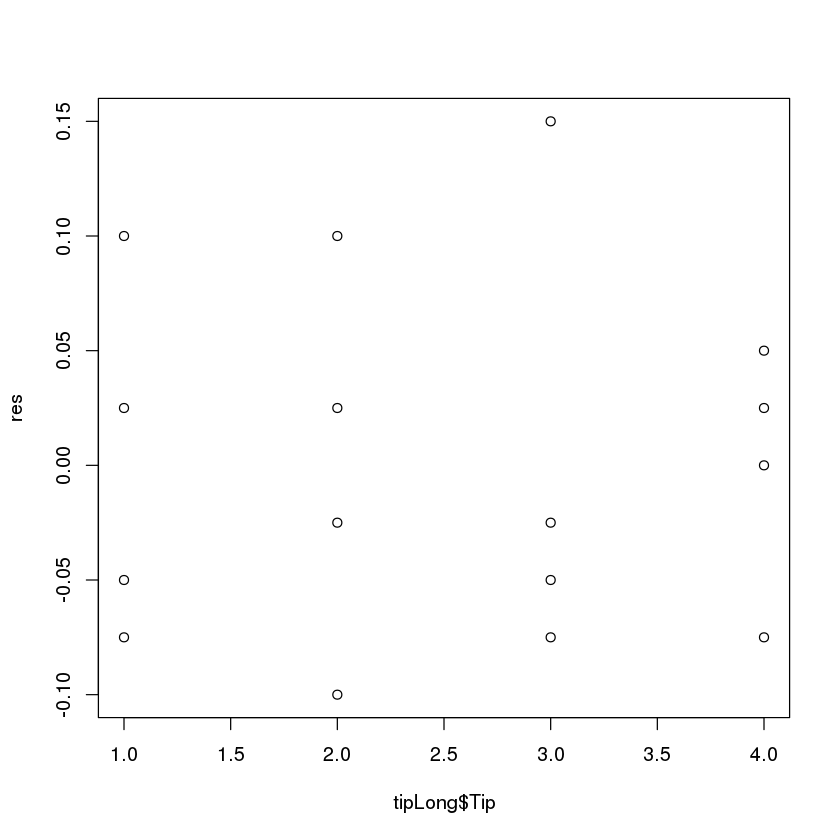

In [13]:
pvalue0.a
pvalue0.b
pvalue0.c
pvalue0.d
pvalue0.e
pvalue0.f
                                         
###########################
# Model Adequacy checking #
###########################
tip.lm=lm(Hardness ~ factor(Tip) + factor(coupon), data = tipLong)
res=residuals(tip.lm)
#normal probability plot(qq plot)
library(car)
qqPlot(res)
#testing for normality of residual
library(nortest)
ad.test(res) #Anderson-Darling test for normality
cvm.test(res) #Cramer-von Mises test for normality
lillie.test(res) #Lilliefors (Kolmogorov-Smirnov) test for normality
pearson.test(res) #Pearson chi-square test for normality
sf.test(res)    #Shapiro-Francia test for normality

#residual plots
plot(fitted(tip.lm), res) 
plot(tipLong$coupon, res)
plot(tipLong$Tip, res)

#test homogeneity of variances 
with(tipLong, bartlett.test(res ~ factor(coupon)))
with(tipLong, bartlett.test(res ~ factor(Tip)))


#### 4.13
Consider the ratio control algorithm experiment described in Section 3.8 The experiment was actually conducted as a randomized block design, where six time periods were selected as the blocks, and all four ratio control algorithms were tested in each time period. The average cell boltage and the standard deviation of voltage (shown in parentheses) for each cell are as follows: 

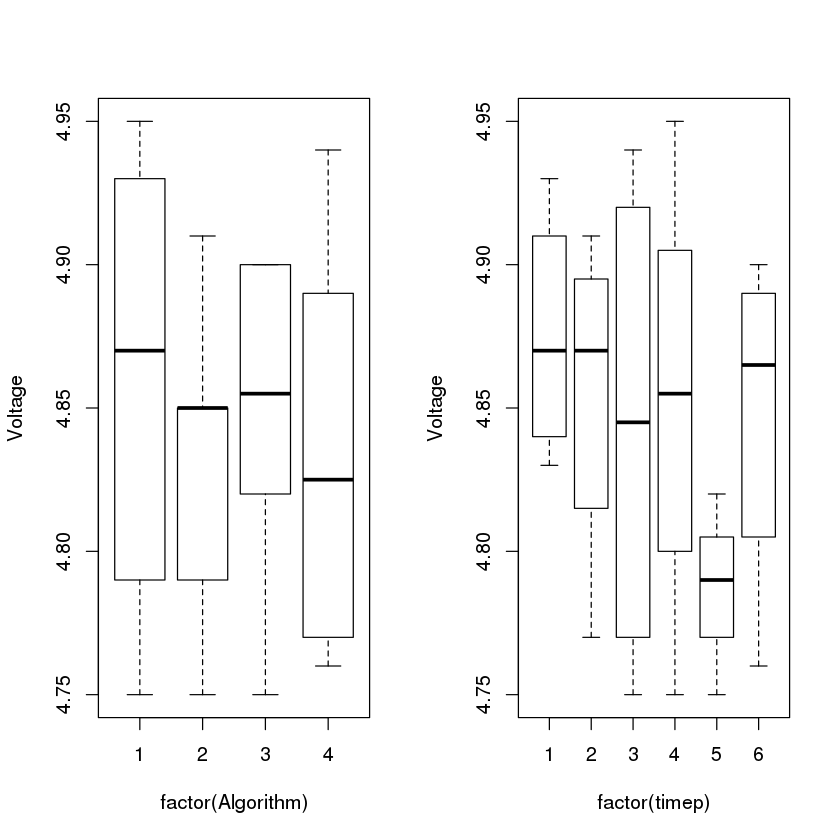

In [14]:
timep = c(1,2,3,4,5,6)
voltm1 = c(4.93, 4.86, 4.75, 4.95, 4.79, 4.88)
voltm2 = c(4.85, 4.91, 4.79, 4.85, 4.75, 4.85)
voltm3 = c(4.83, 4.88, 4.90, 4.75, 4.82, 4.90)
voltm4 = c(4.89, 4.77, 4.94, 4.86, 4.79, 4.76)

rcas1 = c(0.05, 0.04, 0.05, 0.06, 0.03, 0.05)
rcas2 = c(0.04, 0.02, 0.03, 0.05, 0.03, 0.02)
rcas3 = c(0.09, 0.13, 0.11, 0.15, 0.08, 0.12)
rcas4 = c(0.03, 0.04, 0.05, 0.05, 0.03, 0.02)

rca = data.frame(timep,voltm1,voltm2,voltm3,voltm4)
rcasd = data.frame(timep, rcas1, rcas2, rcas3, rcas4)
rcaLong = reshape(rca,
                  varying = c("voltm1", "voltm2", "voltm3", "voltm4"),
                  v.names="Voltage", timevar="Algorithm", direction='long')
par(mfcol = c(1, 2))
plot(Voltage ~ factor(Algorithm) + factor(timep), data = rcaLong)
par(mfrow=c(1,1))

                  Df  Sum Sq  Mean Sq F value Pr(>F)
factor(Algorithm)  3 0.00275 0.000915   0.190  0.901
factor(timep)      5 0.01744 0.003488   0.725  0.615
Residuals         15 0.07218 0.004812               

[1] 4.84375

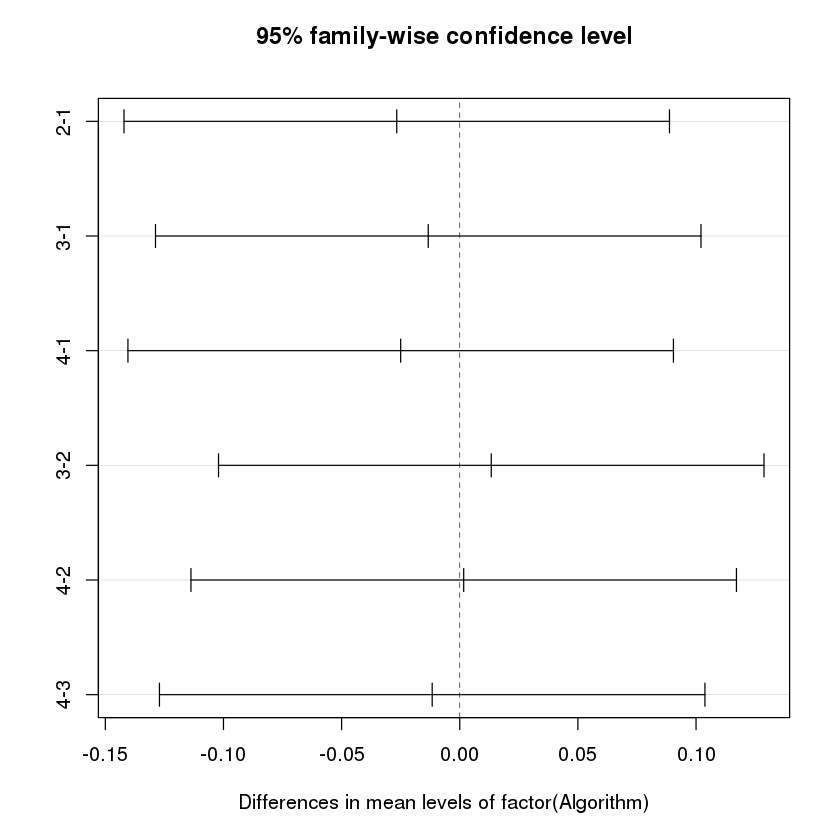

3.1 4.3 
  3  16


	Anderson-Darling normality test

data:  res
A = 0.31843, p-value = 0.5151



	Cramer-von Mises normality test

data:  res
W = 0.056005, p-value = 0.4122



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  res
D = 0.13952, p-value = 0.2637



	Pearson chi-square normality test

data:  res
P = 3.3333, p-value = 0.6487



	Shapiro-Francia normality test

data:  res
W = 0.97378, p-value = 0.669


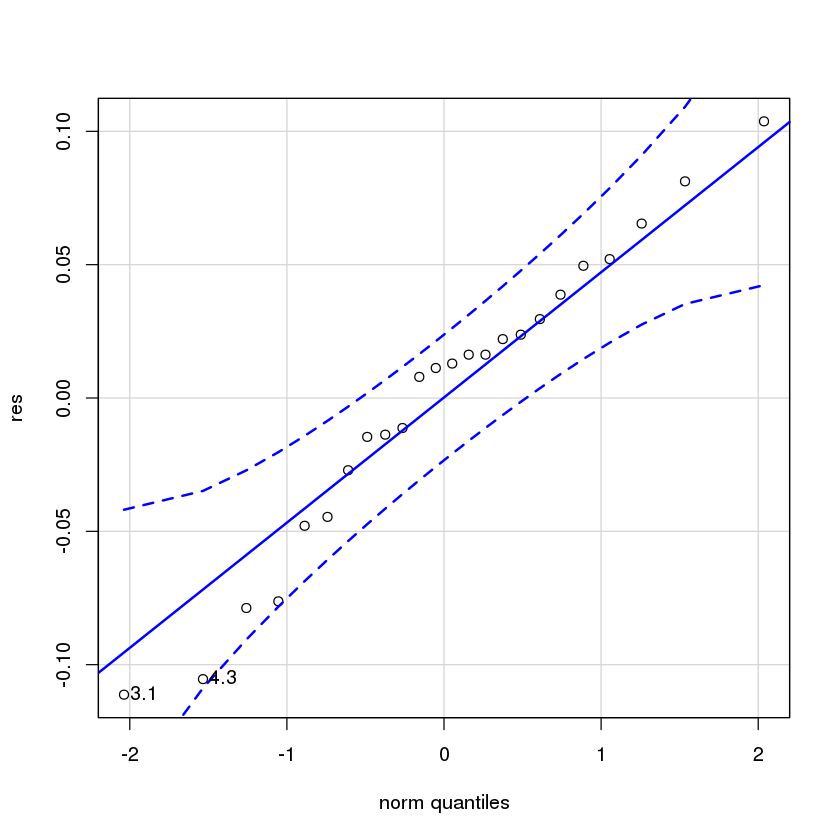

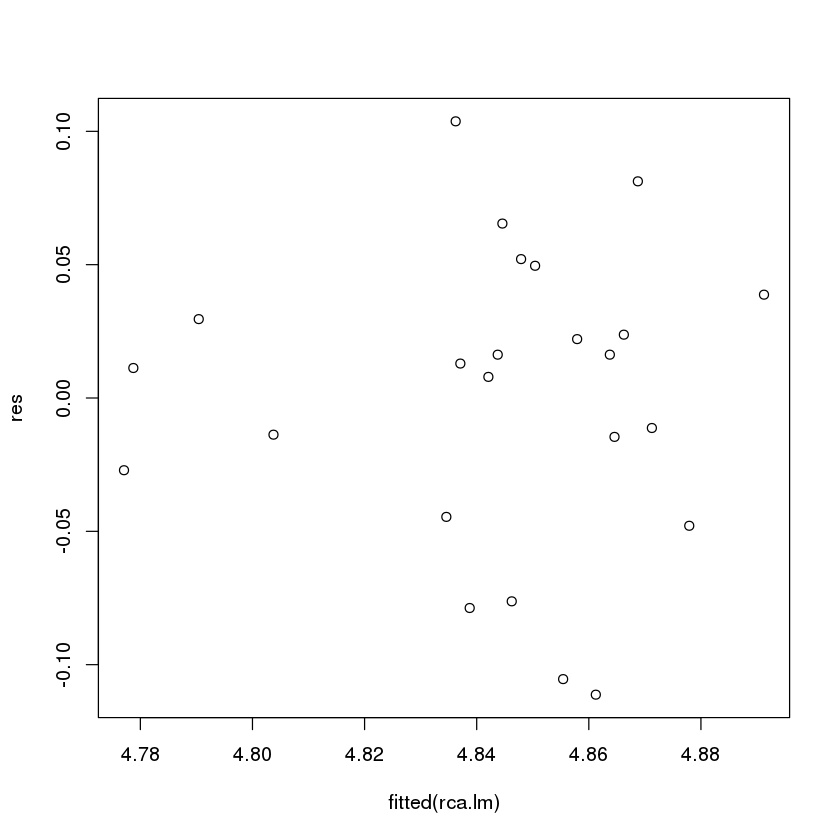

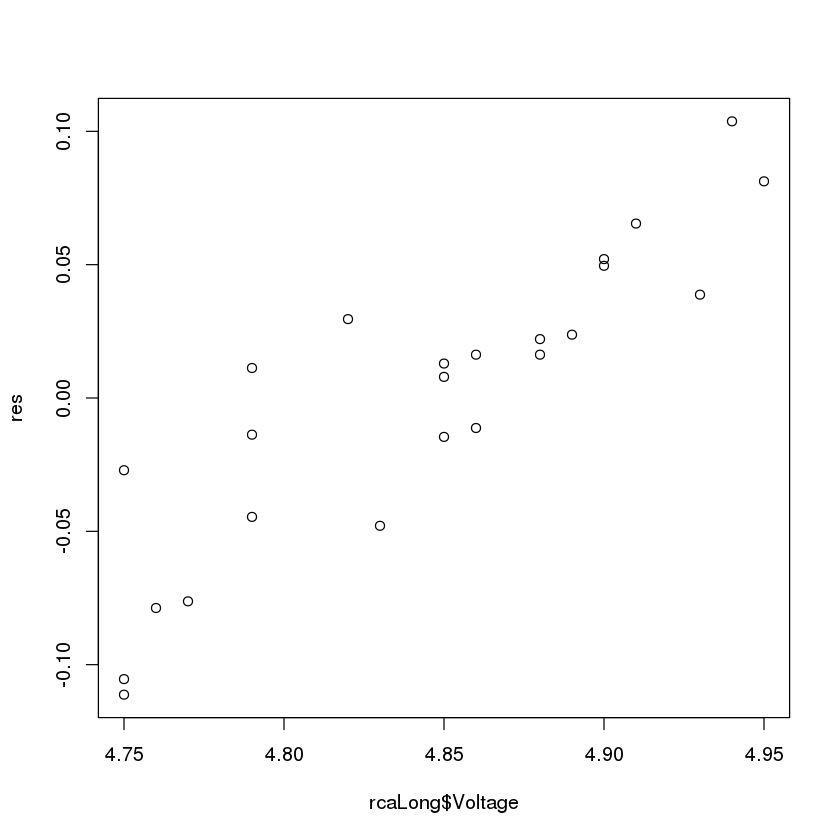


	Bartlett test of homogeneity of variances

data:  res by factor(Algorithm)
Bartlett's K-squared = 1.648, df = 3, p-value = 0.6486



	Bartlett test of homogeneity of variances

data:  res by factor(timep)
Bartlett's K-squared = 5.1838, df = 5, p-value = 0.3939


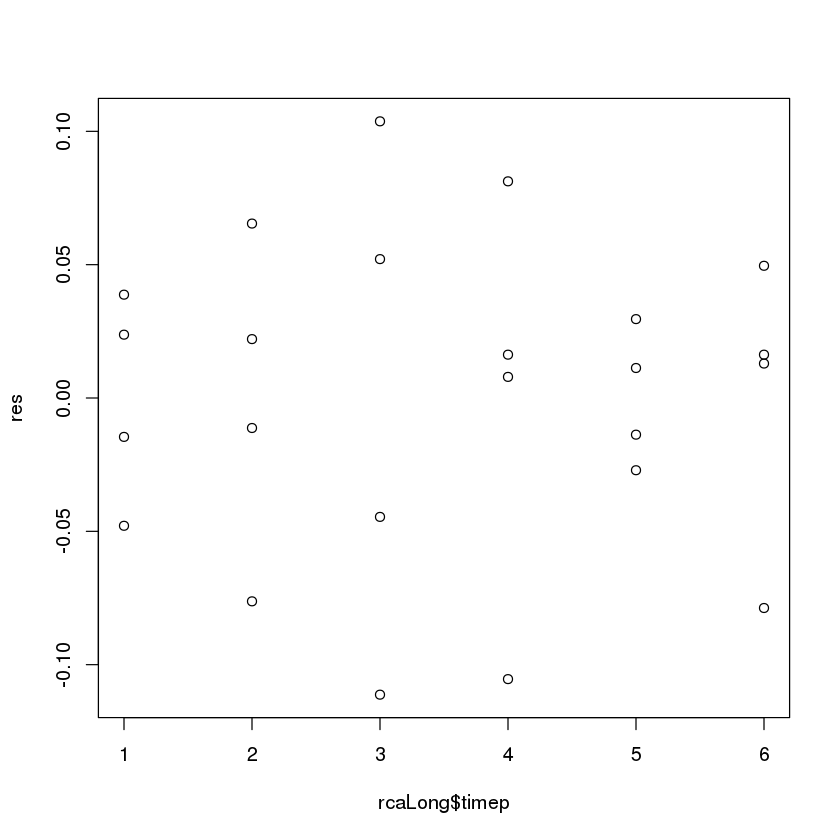

In [15]:


#################################
#  ANOVA test and estimation    #
#################################
#ANOVA analysis
rca.aov = aov(Voltage ~ factor(Algorithm) + factor(timep), data = rcaLong)
summary(rca.aov)
MSe=summary(rca.aov)[[1]][3,3]

#Esimation of the model parameters
#estimate of overall mean mu
overall.mean=mean(rcaLong$Voltage)
overall.mean

ybar.trt=as.vector(with(rcaLong, tapply(Voltage,Algorithm,function(x) mean(x)))) #bar(Y_i.) vector
#Tukey's method (for comparing all possible pairwise means)
rca.TK=TukeyHSD(rca.aov, "factor(Algorithm)")
plot(rca.TK)
                                         

###########################
# Model Adequacy checking #
###########################
rca.lm=lm(Voltage ~ factor(Algorithm) + factor(timep), data = rcaLong)
res=residuals(rca.lm)
#normal probability plot(qq plot)
library(car)
qqPlot(res)
#testing for normality of residual
library(nortest)
ad.test(res) #Anderson-Darling test for normality
cvm.test(res) #Cramer-von Mises test for normality
lillie.test(res) #Lilliefors (Kolmogorov-Smirnov) test for normality
pearson.test(res) #Pearson chi-square test for normality
sf.test(res)    #Shapiro-Francia test for normality

#residual plots
plot(fitted(rca.lm), res) 
plot(rcaLong$Voltage, res)
plot(rcaLong$timep, res)

#test homogeneity of variances 
with(rcaLong, bartlett.test(res ~ factor(Algorithm)))
with(rcaLong, bartlett.test(res ~ factor(timep)))


                  Df  Sum Sq  Mean Sq F value Pr(>F)
factor(Algorithm)  3 0.00275 0.000915   0.190  0.901
factor(timep)      5 0.01744 0.003488   0.725  0.615
Residuals         15 0.07218 0.004812               

[1] 4.84375

[1] 2.262157

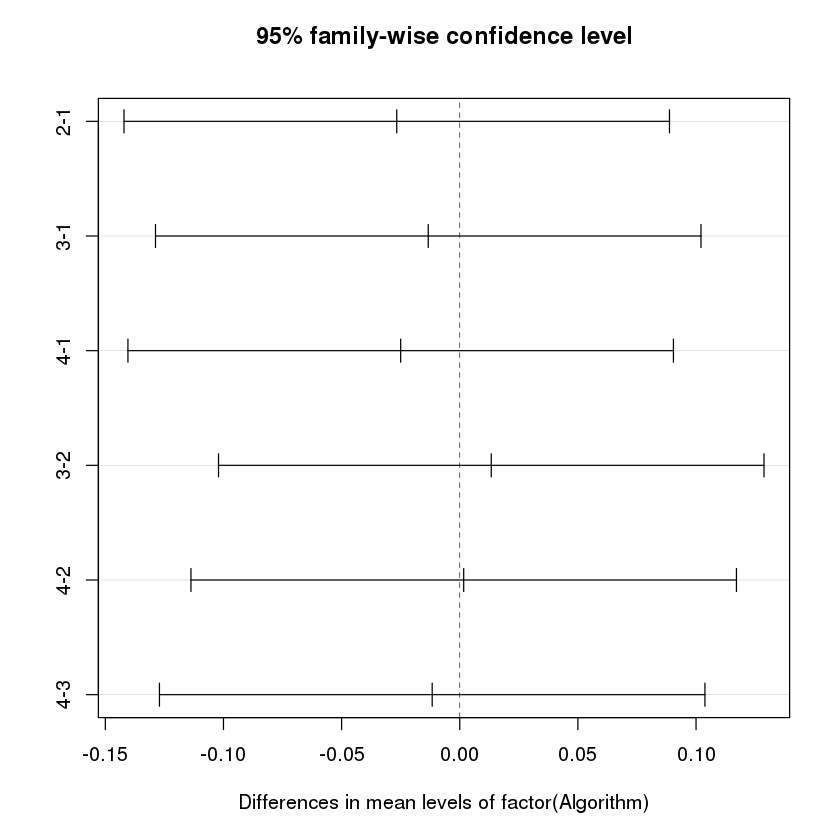

In [64]:
#################################
#  ANOVA test and estimation    #
#################################
#ANOVA analysis
rca.aov = aov(Voltage ~ factor(Algorithm) + factor(timep), data = rcaLong)
summary(rca.aov)
MSe=summary(rca.aov)[[1]][3,3]

#Esimation of the model parameters
#estimate of overall mean mu
overall.mean=mean(rcaLong$Voltage)
overall.mean

ybar.trt=as.vector(with(rcaLong, tapply(Voltage,Algorithm,function(x) mean(x)))) #bar(Y_i.) vector
#Tukey's method (for comparing all possible pairwise means)
rca.TK=TukeyHSD(rca.aov, "factor(Algorithm)")
plot(rca.TK)
   
#Fisher's LSD method 
#e H0: mu3=mu4 vs. Ha:mu3 is not equal to mu4
a=4;b=4;N=a*b;alpha=0.05
t0.a=(ybar.trt[1]-ybar.trt[2])/sqrt(2*MSe/b)
t0.b=(ybar.trt[1]-ybar.trt[3])/sqrt(2*MSe/b)
t0.c=(ybar.trt[1]-ybar.trt[4])/sqrt(2*MSe/b)
t0.d=(ybar.trt[2]-ybar.trt[3])/sqrt(2*MSe/b)
t0.e=(ybar.trt[2]-ybar.trt[4])/sqrt(2*MSe/b)
t0.f=(ybar.trt[3]-ybar.trt[4])/sqrt(2*MSe/b)

cri=qt(alpha/2,(a-1)*(b-1),lower.tail=F)
cri
pvalue0.a=2*pt(abs(t0.a),(a-1)*(b-1),lower.tail=F)
pvalue0.b=2*pt(abs(t0.b),(a-1)*(b-1),lower.tail=F)
pvalue0.c=2*pt(abs(t0.c),(a-1)*(b-1),lower.tail=F)
pvalue0.d=2*pt(abs(t0.d),(a-1)*(b-1),lower.tail=F)
pvalue0.e=2*pt(abs(t0.e),(a-1)*(b-1),lower.tail=F)
pvalue0.f=2*pt(abs(t0.f),(a-1)*(b-1),lower.tail=F)

#### (b.)
Analysis on standard deviation of voltage. Does the choise of ratio control algotrithm affect the 'pot noise'?

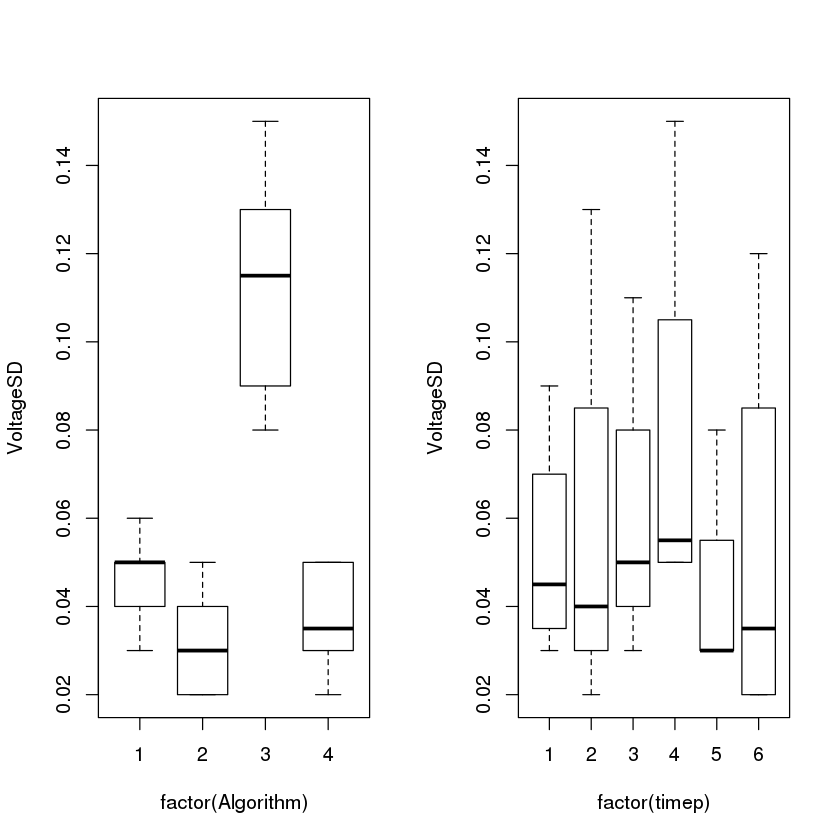

In [33]:
rcasd = data.frame(timep, rcas1, rcas2, rcas3, rcas4)
rsdLong = reshape(rcasd,
                  varying = c("rcas1", "rcas2", "rcas3", "rcas4"),
                  v.names="VoltageSD", timevar="Algorithm", direction='long')
par(mfcol = c(1, 2))
plot(VoltageSD ~ factor(Algorithm) + factor(timep), data = rsdLong)
par(mfrow=c(1,1))

                  Df   Sum Sq  Mean Sq F value   Pr(>F)    
factor(Algorithm)  3 0.026012 0.008671  50.756 4.34e-08 ***
factor(timep)      5 0.002721 0.000544   3.185   0.0371 *  
Residuals         15 0.002563 0.000171                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] 0.05708333

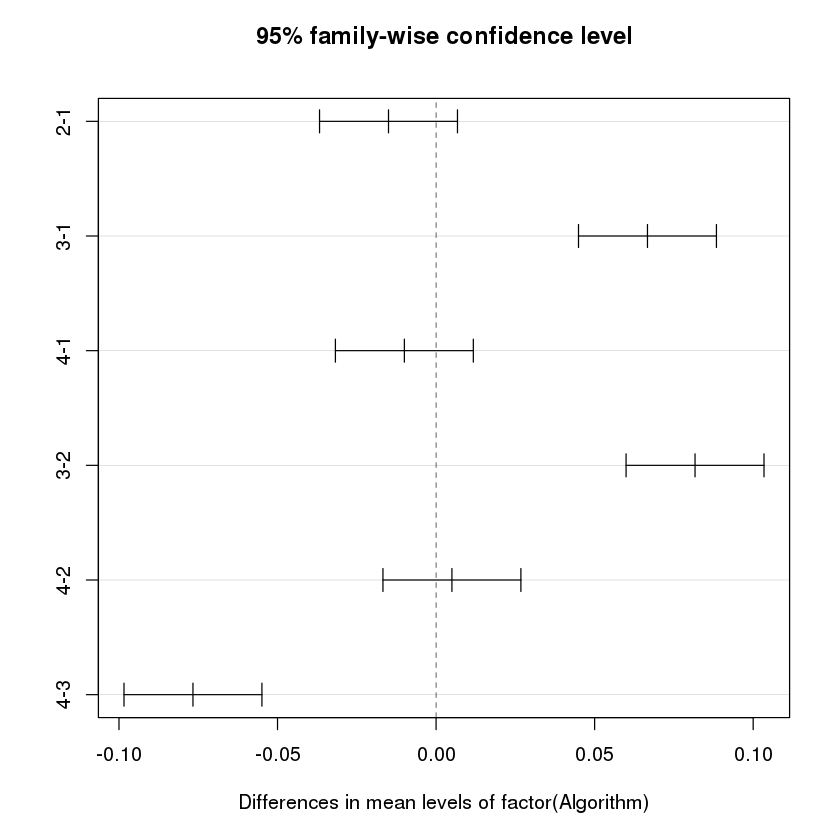

1.3 5.3 
 13  17


	Anderson-Darling normality test

data:  res
A = 0.45403, p-value = 0.247



	Cramer-von Mises normality test

data:  res
W = 0.074585, p-value = 0.2326



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  res
D = 0.14838, p-value = 0.1871



	Pearson chi-square normality test

data:  res
P = 8.6667, p-value = 0.1231



	Shapiro-Francia normality test

data:  res
W = 0.95973, p-value = 0.3674


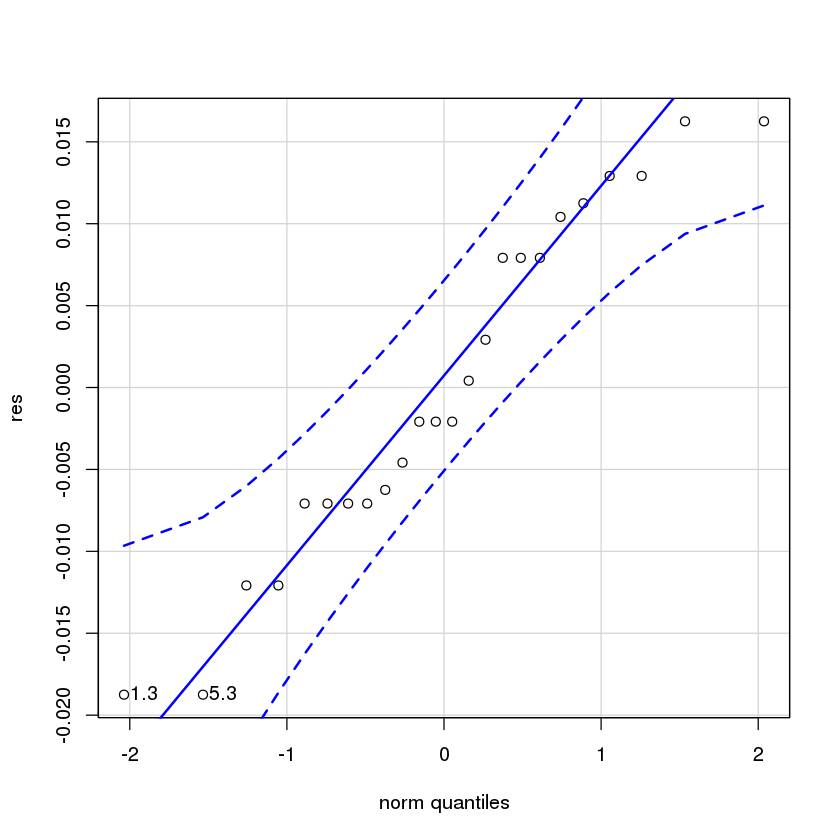

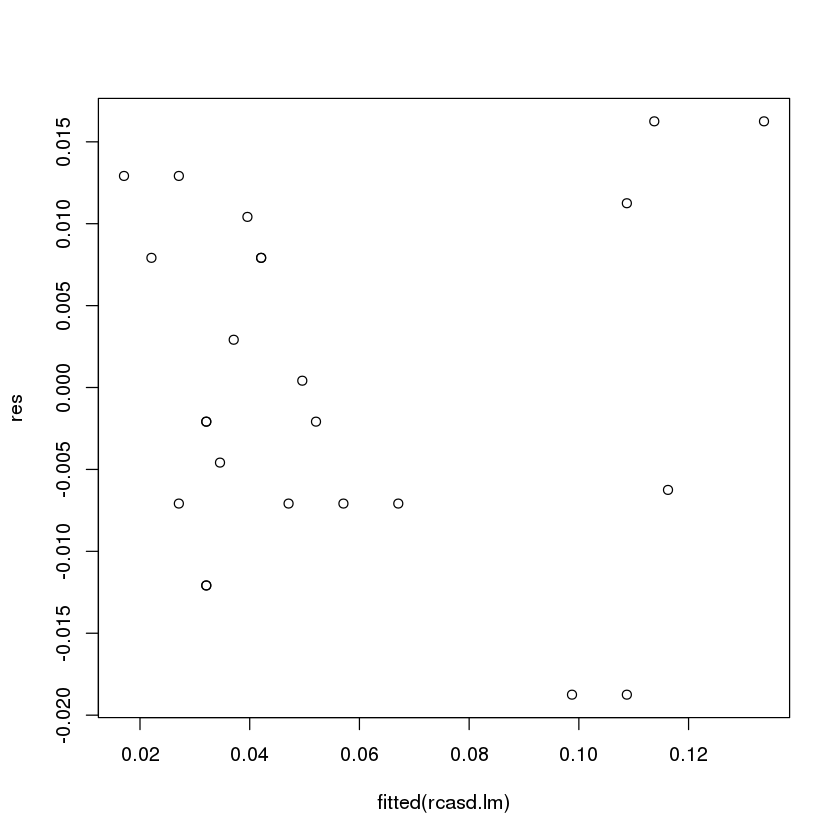

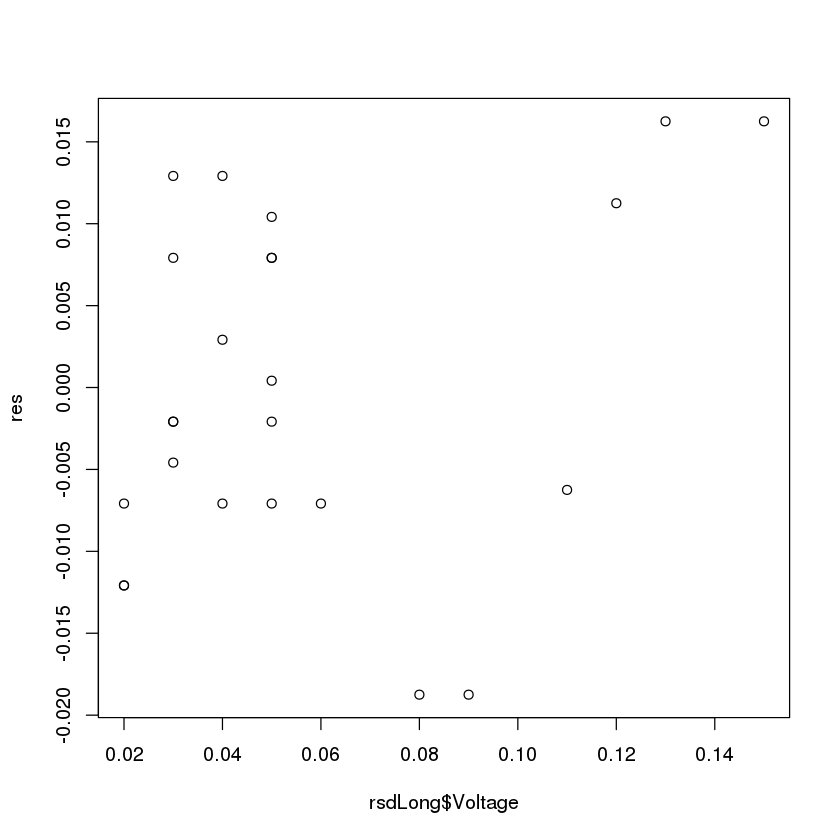


	Bartlett test of homogeneity of variances

data:  res by factor(Algorithm)
Bartlett's K-squared = 4.1942, df = 3, p-value = 0.2412



	Bartlett test of homogeneity of variances

data:  res by factor(timep)
Bartlett's K-squared = 1.2065, df = 5, p-value = 0.9443


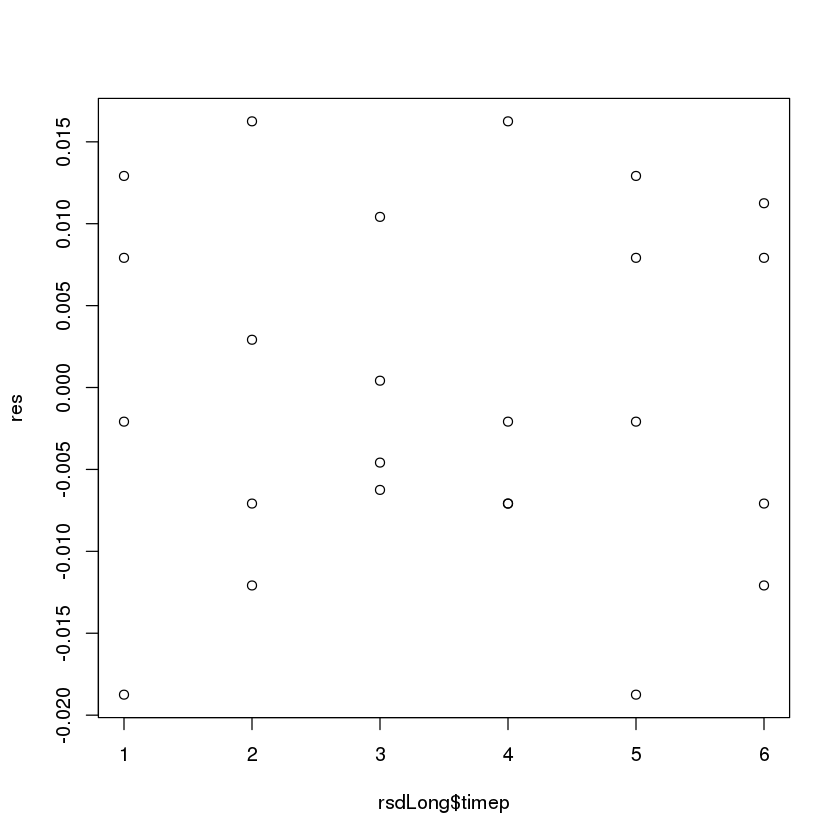

In [34]:


#################################
#  ANOVA test and estimation    #
#################################
#ANOVA analysis
rcasd.aov = aov(VoltageSD ~ factor(Algorithm) + factor(timep), data = rsdLong)
summary(rcasd.aov)
MSe=summary(rcasd.aov)[[1]][3,3]

#Esimation of the model parameters
#estimate of overall mean mu
overall.mean=mean(rsdLong$VoltageSD)
overall.mean

ybar.trt=as.vector(with(rsdLong, tapply(VoltageSD,Algorithm,function(x) mean(x)))) #bar(Y_i.) vector
#Tukey's method (for comparing all possible pairwise means)
rcasd.TK=TukeyHSD(rcasd.aov, "factor(Algorithm)")
plot(rcasd.TK)
                                         

###########################
# Model Adequacy checking #
###########################
rcasd.lm=lm(VoltageSD ~ factor(Algorithm) + factor(timep), data = rsdLong)
res=residuals(rcasd.lm)
#normal probability plot(qq plot)
library(car)
qqPlot(res)
#testing for normality of residual
library(nortest)
ad.test(res) #Anderson-Darling test for normality
cvm.test(res) #Cramer-von Mises test for normality
lillie.test(res) #Lilliefors (Kolmogorov-Smirnov) test for normality
pearson.test(res) #Pearson chi-square test for normality
sf.test(res)    #Shapiro-Francia test for normality

#residual plots
plot(fitted(rcasd.lm), res) 
plot(rsdLong$Voltage, res)
plot(rsdLong$timep, res)

#test homogeneity of variances 
with(rsdLong, bartlett.test(res ~ factor(Algorithm)))
with(rsdLong, bartlett.test(res ~ factor(timep)))


In [ ]:
#Fisher's LSD method 
#e H0: mu3=mu4 vs. Ha:mu3 is not equal to mu4
a=6;b=4;N=a*b;alpha=0.05
t0.a=(ybar.trt[1]-ybar.trt[2])/sqrt(2*MSe/b)
t0.b=(ybar.trt[1]-ybar.trt[3])/sqrt(2*MSe/b)
t0.c=(ybar.trt[1]-ybar.trt[4])/sqrt(2*MSe/b)
t0.d=(ybar.trt[2]-ybar.trt[3])/sqrt(2*MSe/b)
t0.e=(ybar.trt[2]-ybar.trt[4])/sqrt(2*MSe/b)
t0.f=(ybar.trt[3]-ybar.trt[4])/sqrt(2*MSe/b)

cri=qt(alpha/2,(a-1)*(b-1),lower.tail=F)
cri
pvalue0.a=2*pt(abs(t0.a),(a-1)*(b-1),lower.tail=F)
pvalue0.b=2*pt(abs(t0.b),(a-1)*(b-1),lower.tail=F)
pvalue0.c=2*pt(abs(t0.c),(a-1)*(b-1),lower.tail=F)
pvalue0.d=2*pt(abs(t0.d),(a-1)*(b-1),lower.tail=F)
pvalue0.e=2*pt(abs(t0.e),(a-1)*(b-1),lower.tail=F)
pvalue0.f=2*pt(abs(t0.f),(a-1)*(b-1),lower.tail=F)

#### 4.18
Suppose that the observation for chemical type 2, bolts 3 is missing in problem 4.3. Analyze the problem by estimating the missing value. Perform the exact analysis and compare the results

In [21]:
##############################################
#    analysis when observation is missing    #
##############################################
#assume  is missing (observation under chem type 2, within block/batch 3)
chemMissing=chemLong
chemMissing["3.2", "Strength"]=NA

#exact analysis
summary(aov(Strength ~ factor(Chem) + factor(bolt), data = chemMissing))
#NOTE: The order matters! Blocks before Treatments!

#alternative way using lm() and anova()
chem.fit1=lm(Strength ~ factor(Chem) + factor(bolt), data = chemMissing)
chem.fit2=lm(Strength ~ factor(Chem), data = chemMissing)
anova(chem.fit1,chem.fit2)

#approximate analysis
x=predict(aov(Strength ~ factor(Chem) + factor(bolt), data = chemMissing), newdata = chemLong["3.2", ])
x
chemImpute=chemMissing
chemImpute["3.2", "Strength"]=x
a=aov(Strength ~ factor(Chem) + factor(bolt), data = chemImpute)
summary(a)
a$df.residual=a$df.residual - 1 #important: correction of df!
summary(a)

#compare three results:
#orginial
summary(chem.aov)
#missing one + exact analysis
summary(aov(Strength ~ factor(Chem) + factor(bolt), data = chemMissing))
#missing one + approximate analysis
summary(a)



             Df Sum Sq Mean Sq F value   Pr(>F)    
factor(Chem)  3  18.03    6.01   3.038   0.0747 .  
factor(bolt)  4 140.84   35.21  17.797 9.06e-05 ***
Residuals    11  21.76    1.98                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
11,21.7625,NA,NA,NA,NA
15,162.6000,-4,-140.8375,17.79681,9.056283e-05


3.2 
75.25

             Df Sum Sq Mean Sq F value   Pr(>F)    
factor(Chem)  3  12.78    4.26    2.35    0.124    
factor(bolt)  4 158.89   39.72   21.90 1.92e-05 ***
Residuals    12  21.76    1.81                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             Df Sum Sq Mean Sq F value   Pr(>F)    
factor(Chem)  3  12.78    4.26   2.154    0.151    
factor(bolt)  4 158.89   39.72  20.078 5.14e-05 ***
Residuals    11  21.76    1.98                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             Df Sum Sq Mean Sq F value   Pr(>F)    
factor(Chem)  3  12.95    4.32   2.376    0.121    
factor(bolt)  4 157.00   39.25  21.606 2.06e-05 ***
Residuals    12  21.80    1.82                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             Df Sum Sq Mean Sq F value   Pr(>F)    
factor(Chem)  3  18.03    6.01   3.038   0.0747 .  
factor(bolt)  4 140.84   35.21  17.797 9.06e-05 ***
Residuals    11  21.76    1.98                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

             Df Sum Sq Mean Sq F value   Pr(>F)    
factor(Chem)  3  12.78    4.26   2.154    0.151    
factor(bolt)  4 158.89   39.72  20.078 5.14e-05 ***
Residuals    11  21.76    1.98                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### 4.22

The effect of five different ingredients (A,B,C,D,E) on the reaction time of a chemical process is being studied. Each batch of new material is only large enough to permit five runs to be made. Furthermore, each run requires approximately 1.5 hours, so only five runs can be made in one day. Ther pxperimenter decides to run the experiment as a Latin square so that dat and batch effects may be systematically controlled. She obtains the data that follow. Analyze the data from this experiment (use a=0.05) and draw conclusions. 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
batch,1,0.18,0.180000,0.049846154,0.8258453206
day,1,0.02,0.020000,0.005538462,0.9414963581
ingredient,4,141.44,35.360000,9.792000000,0.0002179552
Residuals,18,65.00,3.611111,NA,NA


            Df Sum Sq Mean Sq F value   Pr(>F)    
batch        1   0.18    0.18   0.050 0.825845    
day          1   0.02    0.02   0.006 0.941496    
ingredient   4 141.44   35.36   9.792 0.000218 ***
Residuals   18  65.00    3.61                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

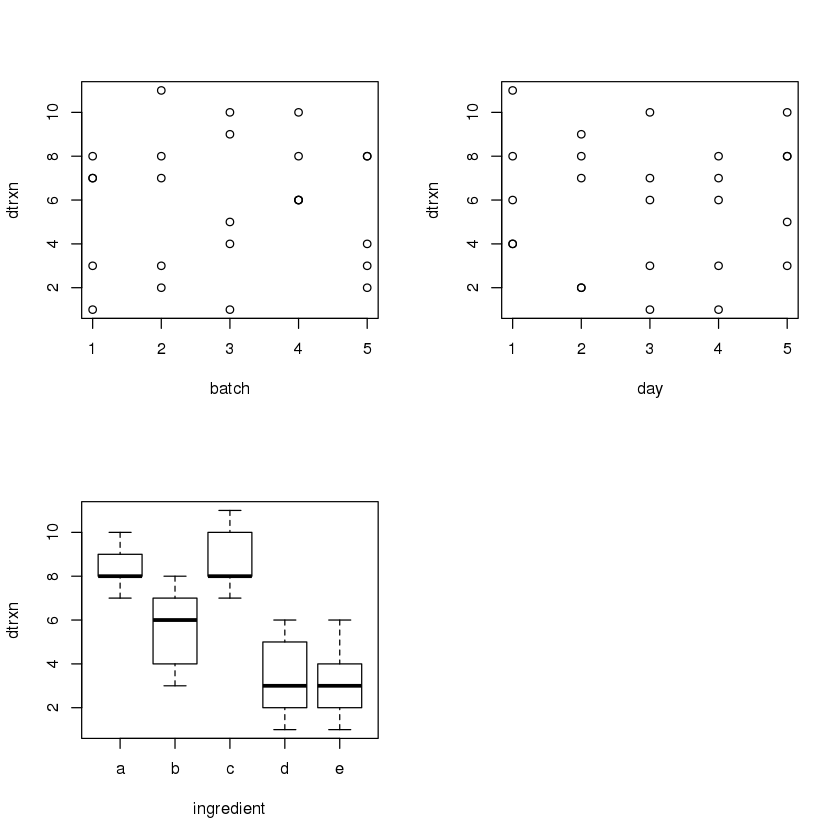

In [32]:
day = rep(c(1,2,3,4,5), 5)
batch = rep(c(1,2,3,4,5), each=5)
ingredient = c('a','b','d','c','e','c','e','a','d','b','b','a','c','e','d','d','c','e','b','a','e','d','b','a','c')
dtrxn = c(8,7,1,7,3,11,2,7,3,8,4,9,10,1,5,6,8,6,6,10,4,2,3,8,8)
chempro = data.frame(batch,day,ingredient,dtrxn)
seed = matrix(chempro$ingredient, 5,5)
freq = matrix(chempro$dtrxn, 5,5)
par(mfrow=c(2,2))
plot(dtrxn ~ batch+day+ingredient, data=chempro)
myfit <- lm(dtrxn ~ batch+day+ingredient, chempro)
anova(myfit)


In [ ]:

#construct confidence interval for mu1-mu2
me=tcri*sp*sqrt(1/n1+1/n2)
CI=c(ybar1-ybar2-me,ybar1-ybar2+me)
CI
